#**Chest X-Ray Images (Pneumonia) Dataset**

##Importing Libraries

In [1]:
%tensorflow_version 2.x
import tensorflow as tf

import pandas as pd
import numpy as np
import itertools
import PIL

from tensorflow.python import keras
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense, Flatten, Conv2D, Dropout, MaxPool2D#, BatchNormalization
from tensorflow.python.keras.preprocessing.image import ImageDataGenerator,array_to_img
from tensorflow.keras.callbacks import ReduceLROnPlateau # use this class when a metric has stopped improving https://keras.io/api/callbacks/reduce_lr_on_plateau/
from tensorflow.keras import optimizers
from tensorflow.keras.utils import to_categorical

from tensorflow.python.keras.preprocessing.image import ImageDataGenerator

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
%matplotlib inline

from keras.datasets import mnist

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

from google.colab import drive

##Mounting GDrive

In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
% cd '/content/drive/MyDrive/Colab Notebooks'

/content/drive/MyDrive/Colab Notebooks


##Defining Hyperparameters

In [4]:
image_dimension = 512
epochs = 15
batch_size = 32

##Reading Dataset

In [5]:
# Creating training, validation, and test image flows
train_gen = ImageDataGenerator(rescale = 1./255, shear_range = 0.2,
                               zoom_range = 0.2,
                               vertical_flip = True)

val_gen = ImageDataGenerator(rescale = 1./255)

train_set = train_gen.flow_from_directory('/content/drive/MyDrive/Colab Notebooks/Assignment_2/train',
                                          target_size = (image_dimension,image_dimension), \
                                          batch_size = batch_size,\
                                          class_mode = 'binary', \
                                          color_mode = 'grayscale')

val_set = val_gen.flow_from_directory('/content/drive/MyDrive/Colab Notebooks/Assignment_2/val',
                                      target_size = (image_dimension,image_dimension),\
                                      batch_size = batch_size,\
                                      class_mode = 'binary',\
                                      color_mode = 'grayscale')

test_gen = ImageDataGenerator(rescale = 1./255)

test_set = test_gen.flow_from_directory('/content/drive/MyDrive/Colab Notebooks/Assignment_2/test',
                                        target_size = (image_dimension,image_dimension),
                                        batch_size = 1,
                                        class_mode = None,
                                        color_mode = 'grayscale',
                                        shuffle=False)

Found 4192 images belonging to 2 classes.
Found 1040 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


##Display the images

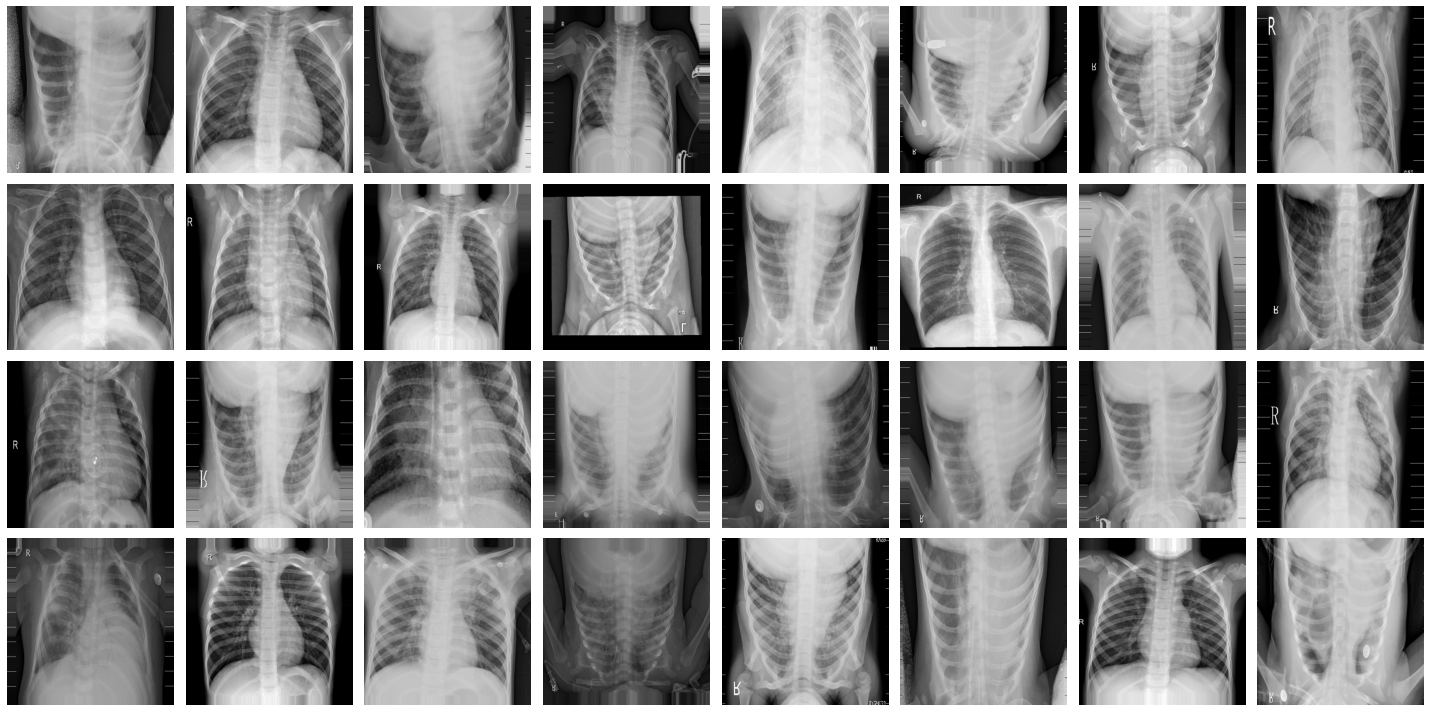

In [6]:

batch = train_set[0][0]

plt.figure(figsize=(20,10))
for i in range(len(batch)):
    plt.subplot(4,8,i+1)
    pil_img = array_to_img(batch[i])
    plt.imshow(pil_img,cmap='gray')
    plt.axis('off')
plt.tight_layout()
plt.show()

##Typically, a case with not pneumonia will show black in the lungs. Describe what you see (3 marks)?

In the chest radiograph, opacity deterimines whether a person has pneumonia or not. In case, the opacity increase then it would mean there is occurance of pneumonia. From the above displayed examples of X-Rays, we can observe that see the difference between normal and pneumonia cases.  

##Building Model

In [7]:
model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),input_shape = (image_dimension,image_dimension,1),activation= 'relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(32,kernel_size=(3,3),input_shape = (image_dimension,image_dimension,1),activation= 'relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(64,kernel_size=(3,3),input_shape = (image_dimension,image_dimension,1),activation= 'relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dropout(rate=0.70))
model.add(Dense(1,activation='sigmoid'))


In [8]:
opt = tf.keras.optimizers.Adam(learning_rate= 0.001)
model.compile(optimizer='Adam', loss = 'binary_crossentropy',metrics=['accuracy'])

lr_reduction = ReduceLROnPlateau(monitor='val_accuracy', patience = 3, verbose=1,factor=0.3, min_lr=0.000001)

In [9]:
#history = model.fit(train_set, epochs = 25, validation_data = val_set,verbose=1,callbacks=[lr_reduction])
history = model.fit(train_set, epochs = epochs, validation_data = val_set,verbose=1,callbacks=[lr_reduction])

Epoch 1/15
131/131 [==============================] - 1606s 12s/step - loss: 0.5451 - accuracy: 0.7798 - val_loss: 0.2439 - val_accuracy: 0.9192
Epoch 2/15
131/131 [==============================] - 124s 943ms/step - loss: 0.2960 - accuracy: 0.8767 - val_loss: 0.1837 - val_accuracy: 0.9365
Epoch 3/15
131/131 [==============================] - 125s 951ms/step - loss: 0.2656 - accuracy: 0.8929 - val_loss: 0.1663 - val_accuracy: 0.9423
Epoch 4/15
131/131 [==============================] - 124s 946ms/step - loss: 0.2217 - accuracy: 0.9136 - val_loss: 0.1485 - val_accuracy: 0.9462
Epoch 5/15
131/131 [==============================] - 124s 945ms/step - loss: 0.2157 - accuracy: 0.9098 - val_loss: 0.1412 - val_accuracy: 0.9510
Epoch 6/15
131/131 [==============================] - 124s 945ms/step - loss: 0.1987 - accuracy: 0.9182 - val_loss: 0.1560 - val_accuracy: 0.9442
Epoch 7/15
131/131 [==============================] - 124s 946ms/step - loss: 0.1867 - accuracy: 0.9299 - val_loss: 0.1463 - 

In [10]:
p = model.predict(test_set)
p[p <= 0.5] = 0
p[p > 0.5] = 1

##Plot training and validation accuracy

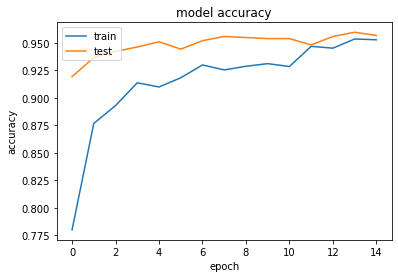

In [13]:
#summarize history for accuracy

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


### How do you interpret the accuracy plot?

We can see that as the number of epcohs increase, the accuracy of the model also increases. Validation dataset is used to observe overfitting in data. During the process of hyperparameter tuning, we observed that with 20 epochs there was slight overfitting as the validation accuracy and training accuracy were overlapping. To avoid this, we reduced the epochs and even increase the dropout rate from 0.35 to 0.45 and then to 0.70. From online literature review we found that dropout rate can be between 0.30 to 0.8. 
We also used ReduceLROnPlateau function to reduce learning rate automitically if the validation accuracy does not improve. 

##Plot training and validation loss

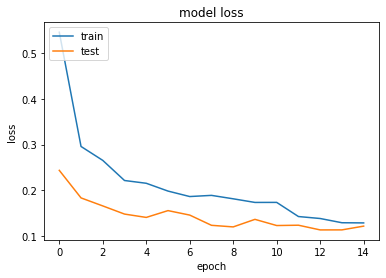

In [14]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

### How do you interpret the loss plot?

The training loss measures how well the model fits the training data, whereas the validation loss measures how well it fits new data. As explained above we increased the dropout rate, used ReduceLROnPlateau and reduced number of epochs to avoid overfitting.  

In [12]:
# Confusion matrix

cm = pd.DataFrame(data=confusion_matrix(test_set.classes, p, labels=[0, 1]),
                  index=["Actual Normal", "Actual Pneumonia"],
                  columns=["Predicted Normal", "Predicted Pneumonia"])
cm

,Predicted Normal,Predicted Pneumonia
Actual Normal,165,69
Actual Pneumonia,8,382
